In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import re

#Read multiple files
import glob

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [43]:
train_data=pd.read_csv("training_data.csv",low_memory=False)
train_data[['Policy_Zip_Code_Garaging_Location','Vehicle_Miles_To_Work','Vehicle_Med_Pay_Limit','Vehicle_Physical_Damage_Limit','Vehicle_Comprehensive_Coverage_Limit','Vehicle_Collision_Coverage_Deductible','EEA_Policy_Zip_Code_3']].head()

,Policy_Zip_Code_Garaging_Location,Vehicle_Miles_To_Work,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Limit,Vehicle_Collision_Coverage_Deductible,EEA_Policy_Zip_Code_3
0,43046,-1,1000,100000,-1,500,430
1,Unknown,-1,2000,50000,-1,50,Unknown
2,43555,-1,50000,100000,-1,100,435
3,43561,-1,5000,35000,-1,250,435
4,43561,-1,5000,35000,-1,250,435


In [44]:
print('Max value for loss ratio :: ',train_data[['Loss_Ratio']].max())         #query('Loss_Ratio != 0').count()
print('Min value for loss ratio :: ',train_data[['Loss_Ratio']].min())
print('Mean value for loss ratio :: ',train_data[['Loss_Ratio']].mean())
print('Median value for loss ratio :: ',train_data[['Loss_Ratio']].median())

Max value for loss ratio ::  Loss_Ratio    24787.14
dtype: float64
Min value for loss ratio ::  Loss_Ratio    0.0
dtype: float64
Mean value for loss ratio ::  Loss_Ratio    1.154623
dtype: float64
Median value for loss ratio ::  Loss_Ratio    0.0
dtype: float64


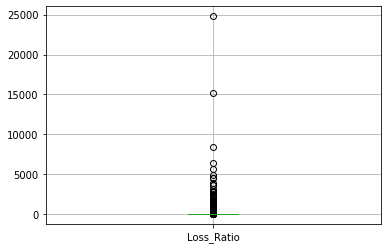

In [45]:
#train_data['Loss_Ratio'].hist(bins=20)    ## ['Loss_Ratio'].plot.hist()
boxplot = train_data.boxplot(column=['Loss_Ratio'])

In [46]:
train_data[['Loss_Ratio']].count()

Loss_Ratio    424431
dtype: int64

In [47]:
train_data[['Loss_Ratio']].query('Loss_Ratio > 2000').count()

Loss_Ratio    20
dtype: int64

In [48]:
#train_data = train_data[train_data['Vehicle_Days_Per_Week_Driven'] != -1]
train_data = train_data[train_data['EEA_Policy_Tenure'] != -1]
train_data = train_data[train_data['Vehicle_Passive_Restraint'] != 'Unknown']

# Removing outliers
train_data = train_data[train_data['Loss_Ratio'] < 1000]


#train_data.replace({'Vehicle_Symbol': -1},8,inplace=True)

In [49]:
train_data[['Loss_Ratio']].count()

Loss_Ratio    424249
dtype: int64

In [50]:
train_data['EEA_Policy_Tenure'].mode()

0    0.0
dtype: float64

In [51]:
# Imputing generic values for training data frame
def impute_generic(col_nm, old_val, new_val):
    col_name = col_nm
    old_val = old_val
    new_val = new_val
    
    if col_name=='Vehicle_Symbol':
        train_data.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Vehicle_Number_Of_Drivers_Assigned':
         train_data.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Vehicle_Days_Per_Week_Driven':
         train_data.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Vehicle_Anti_Theft_Device':
         train_data.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Vehicle_Collision_Coverage_Deductible':
         train_data.replace({col_name: old_val},new_val,inplace=True)

    elif col_name=='Vehicle_Comprehensive_Coverage_Limit':
         train_data.replace({col_name: old_val},new_val,inplace=True)

            
    else:
        print('Updated columns')

In [52]:
# Impute values for Garaging location zip code
impute_generic('Vehicle_Symbol', -1, 8)
impute_generic('Vehicle_Number_Of_Drivers_Assigned', 99, 1)
impute_generic('Vehicle_Days_Per_Week_Driven', 8, 7)
impute_generic('Vehicle_Days_Per_Week_Driven', 9, 7)
impute_generic('Vehicle_Days_Per_Week_Driven', -1, 5)
impute_generic('Vehicle_Anti_Theft_Device', 'Unknown', 'Not Applicable')
impute_generic('Vehicle_Collision_Coverage_Deductible', -1, 500)
impute_generic('Vehicle_Comprehensive_Coverage_Limit', -1, 0)

In [53]:
#vj = 
train_data[['Vehicle_Bodily_Injury_Limit','Vehicle_Comprehensive_Coverage_Limit']].groupby(['Vehicle_Comprehensive_Coverage_Limit']).count()   #.agg(lambda x: stats.mode(x)[0][0])        #query('Vehicle_Days_Per_Week_Driven == 7')
#vj.count()
#train_data['EEA_Prior_Bodily_Injury_Limit'].groupby(train_data['Vehicle_Physical_Damage_Limit']).sum().plot.bar()

,Vehicle_Bodily_Injury_Limit
Vehicle_Comprehensive_Coverage_Limit,
0,406929
75000,0
100000,0
200000,0
300000,0
500000,0
750000,0
1000000,0


In [54]:
# Analysis
print(sorted(train_data['Vehicle_Territory'].unique()))

[13, 15, 16, 17, 18, 19, 20, 22, 26, 27, 30, 31, 32, 35, 36, 37]


In [55]:
# Vehicle territory binning
bins= [12,17,23,30,31,32,37]
groups = ['VT-1','VT-2','VT-3','VT-4','VT-5','VT-6']

In [56]:
train_data['Veh_ter']=pd.cut(train_data['Vehicle_Territory'], bins, labels=groups)
train_data[['Vehicle_Territory','Veh_ter','Policy_Zip_Code_Garaging_Location','EEA_Policy_Zip_Code_3']].groupby(['Veh_ter']).count()

,Vehicle_Territory,Policy_Zip_Code_Garaging_Location,EEA_Policy_Zip_Code_3
Veh_ter,,,
VT-1,14909,14909,14909
VT-2,8408,8408,8408
VT-3,91123,91123,91123
VT-4,180312,180312,180312
VT-5,9374,9374,9374
VT-6,120123,120123,120123


In [57]:
train_data[['Vehicle_Territory','Veh_ter','Policy_Zip_Code_Garaging_Location','EEA_Policy_Zip_Code_3']].groupby(['Veh_ter']).agg(lambda x: stats.mode(x)[0][0])

,Vehicle_Territory,Policy_Zip_Code_Garaging_Location,EEA_Policy_Zip_Code_3
Veh_ter,,,
VT-1,17,43377,435
VT-2,20,44052,437
VT-3,30,42988,429
VT-4,31,43368,433
VT-5,32,42480,424
VT-6,35,42878,428


In [58]:
# Function to impute Garrage zip code
def impute_zip(cols):
    veh_territory = cols[0]
    Garage_zip = cols[1]

    if Garage_zip=='Unknown':
        if veh_territory == 'VT-1':
            return 43377

        elif veh_territory == 'VT-2':
            return 44052
        
        elif veh_territory == 'VT-3':
            return 42988
        
        elif veh_territory == 'VT-4':
            return 43368
        
        elif veh_territory == 'VT-5':
            return 42480

        else:
            return 42878

    else:
        return Garage_zip

In [59]:
# Function to impute policy zip code
def impute_pzip(cols):
    veh_territory = cols[0]
    Policy_zip = cols[1]
    
#    if pd.isnull(Age):
    if Policy_zip=='Unknown':
        if veh_territory == 'VT-1':
            return 435

        elif veh_territory == 'VT-2':
            return 437
        
        elif veh_territory == 'VT-3':
            return 429
        
        elif veh_territory == 'VT-4':
            return 433
        
        elif veh_territory == 'VT-5':
            return 424

        else:
            return 428

    else:
        return Policy_zip

In [60]:
veh_analyze=train_data[['Vehicle_Usage','Policy_Method_Of_Payment','Driver_Total_Upper_Senior_Ages_70_plus','Vehicle_Miles_To_Work']].query('Vehicle_Miles_To_Work != -1')
qry1=veh_analyze.query('Vehicle_Usage == "Business"')
veh_analyze[['Vehicle_Usage','Policy_Method_Of_Payment','Driver_Total_Upper_Senior_Ages_70_plus','Vehicle_Miles_To_Work']].groupby(['Vehicle_Usage','Policy_Method_Of_Payment']).mean()  #.agg(lambda x: stats.mode(x)[0][0])  # 

Driver_Total_Upper_Senior_Ages_70_plus  \
Vehicle_Usage Policy_Method_Of_Payment                                           
Business      Installment                                             0.010965   
              Pre-paid                                                0.036392   
Farm          Installment                                             0.075758   
              Pre-paid                                                0.240506   
Pleasure      Installment                                             0.054332   
              Pre-paid                                                0.172840   
Work          Installment                                             0.007824   
              Pre-paid                                                0.026286   

                                        Vehicle_Miles_To_Work  
Vehicle_Usage Policy_Method_Of_Payment                         
Business      Installment                           45.213816  
              Pre-paid                              44.678797  
Farm          Installment                            5.000000  
              Pre-paid                               2.930380  
Pleasure      Installment                            4.135095  
              Pre-paid                               4.001543  
Work          Installment                           10.248840  
              Pre-paid                              10.292779

In [61]:
# Function to impute policy zip code
def impute_miles(cols):
    mile_work = cols[0]
    Vehicle_Usage = cols[1]
    pay_meth = cols[2]
    
    if mile_work==-1:
        if Vehicle_Usage == 'Business':
            return 45
        
        elif Vehicle_Usage == 'Farm' :
            return 10
        
        elif Vehicle_Usage == 'Pleasure':
            return 4

        else:
            return 10

    else:
        return mile_work

In [62]:
#print(sorted(train_data['Vehicle_Med_Pay_Limit'].unique()))
#print(sorted(train_data['EEA_Policy_Tenure'].unique()))
#print(sorted(train_data['Vehicle_Comprehensive_Coverage_Indicator'].unique()))
#print(sorted(train_data['Vehicle_Safe_Driver_Discount_Indicator'].unique()))
train_data[['EEA_Policy_Tenure']].query('EEA_Policy_Tenure == -1').count()

EEA_Policy_Tenure    0
dtype: int64

In [63]:
# Binning for Vehicle medical pay limit
medbins= [-0.1,10,20,30,40,54]
medgroups = ['med-1','med-2','med-3','med-4','med-5']
med_analyze=train_data[['Vehicle_Med_Pay_Limit','EEA_Policy_Tenure','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator']].query('EEA_Policy_Tenure != -1')

In [64]:
train_data['med_pay']=pd.cut(train_data['EEA_Policy_Tenure'], medbins, labels=medgroups)

In [65]:
#sorted(train_data['EEA_Policy_Tenure'].unique())
train_data[['EEA_Policy_Tenure','med_pay']].query('med_pay.isnull()', engine='python')
#train_data['med_pay'].isnull().sum()  #  unique()  -- 41876

,EEA_Policy_Tenure,med_pay


In [66]:
#med_analyze.head()
train_data[['med_pay','Vehicle_Med_Pay_Limit','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator']].groupby(['Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator','med_pay']).agg(lambda x: stats.mode(x)[0][0])

Vehicle_Med_Pay_Limit
Vehicle_Comprehensive_Coverage_Indicator Vehicle_Safe_Driver_Discount_Indicator med_pay                       
N                                        N                                      med-1                     1000
                                                                                med-2                     1000
                                                                                med-3                     1000
                                                                                med-4                     1000
                                                                                med-5                     1000
                                         Y                                      med-1                     1000
                                                                                med-2                     1000
                                                                                med-3                     1000
                                                                                med-4                     1000
                                                                                med-5                     1000
Y                                        N                                      med-1                     1000
                                                                                med-2                     5000
                                                                                med-3                     1000
                                                                                med-4                     1000
                                                                                med-5                     5000
                                         Y                                      med-1                       -1
                                                                                med-2                     1000
                                                                                med-3                     1000
                                                                                med-4                     1000
                                                                                med-5                     5000

In [67]:
#med_analyze=train_data[['Vehicle_Med_Pay_Limit','EEA_Policy_Tenure','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator']].query('Vehicle_Med_Pay_Limit != -1')
#qry1=veh_analyze.query('Vehicle_Usage == "Business"')
#veh_analyze[['Vehicle_Med_Pay_Limit','EEA_Policy_Tenure','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator']].groupby(['Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator']).mean()  #.agg(lambda x: stats.mode(x)[0][0])  # 

In [68]:
# Function to impute vehicle medical pay limit
def impute_medlim(cols):
    Med_Pay_Limit = cols[0]
    covrg_ind = cols[1]
    drvdisc_ind = cols[2]
    med_pay = cols[3]
    
    if Med_Pay_Limit==-1:
        if covrg_ind == 'Y' and drvdisc_ind=='N' and (med_pay=='med-2' or med_pay=='med-5'):
            return 5000

        elif covrg_ind == 'Y' and drvdisc_ind=='Y' and (med_pay=='med-1' or med_pay=='med-5'):
            return 5000

        else:
            return 1000

    else:
        return Med_Pay_Limit

In [69]:
#train_data[['Vehicle_Med_Pay_Limit']].query('Vehicle_Med_Pay_Limit == -1').count()
train_data[['Vehicle_Physical_Damage_Limit']].query('Vehicle_Physical_Damage_Limit == -1').count()
train_data[['Vehicle_Physical_Damage_Limit']].query('Vehicle_Physical_Damage_Limit == -1').count()

Vehicle_Physical_Damage_Limit    17332
dtype: int64

In [70]:
train_data[['Vehicle_Physical_Damage_Limit','Vehicle_Bodily_Injury_Limit','EEA_Prior_Bodily_Injury_Limit','EEA_Liability_Coverage_Only_Indicator']].groupby(['Vehicle_Bodily_Injury_Limit','EEA_Prior_Bodily_Injury_Limit','EEA_Liability_Coverage_Only_Indicator']).agg(lambda x: stats.mode(x)[0][0])

Vehicle_Physical_Damage_Limit
Vehicle_Bodily_Injury_Limit EEA_Prior_Bodily_Injury_Limit EEA_Liability_Coverage_Only_Indicator                               
100-300                     100-200                       N                                                              50000
                                                          Y                                                              50000
100-500                     75-300                        N                                                             100000
                                                          Y                                                             100000
1M-1M                       750-750                       N                                                            1000000
                                                          Y                                                             100000
25-50                       20-50                         N                                                              25000
                                                          Y                                                              25000
250-500                     100-400                       N                                                             100000
                                                          Y                                                             100000
300-500                     200-400                       N                                                             100000
                                                          Y                                                             100000
50-100                      40-100                        N                                                              50000
                                                          Y                                                              50000
500-500                     300-300                       N                                                             500000
                                                          Y                                                             500000

In [71]:
# Function to impute vehicle Physical Damage limit
def impute_phydamage(cols):
    Phy_dam_lim = cols[0]
    bod_injury = cols[1]
    Covrg_ind = cols[2]
    
    if Phy_dam_lim==-1:
        if Phy_dam_lim == '100-300' :
            return 50000
       
        elif Phy_dam_lim == '1M-1M' and Covrg_ind=='N' :
            return 5000
        
        elif Phy_dam_lim == '25-50' :
            return 25000
        
        elif Phy_dam_lim == '50-100' :
            return 50000
        
        elif Phy_dam_lim == '500-500' :
            return 500000

        else:
            return 100000

    else:
        return Phy_dam_lim

In [72]:
# Function to impute Vehicle bodily injury limit
def impute_binjury(cols):
    phy_damage = cols[0]
    bodily_injury = cols[1]
    
#    if pd.isnull(Age):
    if bodily_injury==np.nan:
        if phy_damage == 25000:
            return '25-50'

        elif phy_damage == 35000:
            return '50-100'
        
        elif phy_damage == 250000:
            return '250-500'
        
        elif phy_damage == 500000:
            return '500-500'
        
        elif phy_damage == 1000000:
            return '1M-1M'

        else:
            return '100-300'

    else:
        return bodily_injury

In [73]:
# Function to impute EEA_Prior_Bodily_Injury_Limit
def impute_eeainjury(cols):
    phy_damage = cols[0]
    eea_injury = cols[1]
    
#    if pd.isnull(Age):
    if eea_injury==np.nan:
        if phy_damage == 25000:
            return '20-50'

        elif phy_damage == 35000:
            return '40-100'
        
        elif phy_damage == 250000:
            return '100-400'
        
        elif phy_damage == 500000:
            return '300-300'
        
        elif phy_damage == 1000000:
            return '750-750'

        else:
            return '100-200'

    else:
        return eea_injury

In [74]:
# Impute values for Garaging location zip code
train_data['Policy_Zip_Code_Garaging_Location'] = train_data[['Veh_ter','Policy_Zip_Code_Garaging_Location']].apply(impute_zip,axis=1)

# Impute values for Policy zip code
train_data['EEA_Policy_Zip_Code_3'] = train_data[['Veh_ter','EEA_Policy_Zip_Code_3']].apply(impute_pzip,axis=1)

# Impute values for Vehicle miles at work
train_data['Vehicle_Miles_To_Work'] = train_data[['Vehicle_Miles_To_Work','Vehicle_Usage','Policy_Method_Of_Payment']].apply(impute_miles,axis=1)

# Impute values for Vehicle medical pay limit
train_data['Vehicle_Med_Pay_Limit'] = train_data[['Vehicle_Med_Pay_Limit','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator','med_pay']].apply(impute_medlim,axis=1)

# Impute values for Vehicle physical damage limit
train_data['Vehicle_Physical_Damage_Limit'] = train_data[['Vehicle_Physical_Damage_Limit','Vehicle_Bodily_Injury_Limit','EEA_Liability_Coverage_Only_Indicator']].apply(impute_phydamage,axis=1)

# Impute values for bodily injury limit
train_data['Vehicle_Bodily_Injury_Limit'] = train_data[['Vehicle_Bodily_Injury_Limit','Vehicle_Physical_Damage_Limit']].apply(impute_binjury,axis=1)

# Impute values for Vehicle physical damage limit
train_data['EEA_Prior_Bodily_Injury_Limit'] = train_data[['EEA_Prior_Bodily_Injury_Limit','Vehicle_Physical_Damage_Limit']].apply(impute_eeainjury,axis=1)


In [75]:
#train_data['pol_zip_code']=train_data['Policy_Zip_Code_Garaging_Location'].astype(str).str[0]
#train_data[['pol_zip_code']].head()

In [76]:
# Function to clean vehicle make description 
def Clean_names(Vehicle_Make_Description):  
    if re.search('MER.*', Vehicle_Make_Description):          
        return 'MERCEDES'   # return the cleaned name
    elif re.search('TOY.*', Vehicle_Make_Description):
            return 'TOYOTA'
    elif re.search('TYT.*', Vehicle_Make_Description):
            return 'TOYOTA'
    elif re.search('SUZU.*', Vehicle_Make_Description):
            return 'SUZUKI'
    elif re.search('VOLK.*', Vehicle_Make_Description):
            return 'VOLKSWAGEN'
    elif re.search('YOL.*', Vehicle_Make_Description):
            return 'VOLKSWAGEN'
    elif re.search('PNTIAC.*', Vehicle_Make_Description):
            return 'PONTIAC'
    elif re.search('POINT.*', Vehicle_Make_Description):
            return 'PONTIAC'
    elif re.search('PONT.*', Vehicle_Make_Description):
            return 'PONTIAC'
    elif re.search('SAT.*', Vehicle_Make_Description):
            return 'SATURN'
    elif re.search('MINI.*', Vehicle_Make_Description):
            return 'MINICOOPER'
    elif re.search('LI.*', Vehicle_Make_Description):
            return 'LINCOLN'    
    elif re.search('LON.*', Vehicle_Make_Description):
            return 'LINCOLN'
    elif re.search('LEX.*', Vehicle_Make_Description):
            return 'LEXUS'
    elif re.search('JEEP.*', Vehicle_Make_Description):
            return 'JEEP'
    elif re.search('JEP.*', Vehicle_Make_Description):
            return 'JEEP'
    elif re.search('NSSN.*', Vehicle_Make_Description):
            return 'NISSAN'
    elif re.search('NSN.*', Vehicle_Make_Description):
            return 'NISSAN'
    elif re.search('SUBA.*', Vehicle_Make_Description):
            return 'SUBARU'
    elif re.search('TRIUMP.*', Vehicle_Make_Description):
            return 'TRIUMPH'
    elif re.search('BUI.*', Vehicle_Make_Description):
            return 'BUIK'
    elif re.search('CAD.*', Vehicle_Make_Description):
            return 'CADILLAC'
    elif re.search('CHE.*', Vehicle_Make_Description):
            return 'CHEVROLET'
    elif re.search('CHV.*', Vehicle_Make_Description):
            return 'CHEVROLET'
    elif re.search('CEH.*', Vehicle_Make_Description):
            return 'CHEVROLET'
    elif re.search('K20.*', Vehicle_Make_Description):
            return 'CHEVROLET'
    elif re.search('CHRY.*', Vehicle_Make_Description):
            return 'CHRYSLER'
    elif re.search('DATS.*', Vehicle_Make_Description):
            return 'DATSON'
    elif re.search('DOD.*', Vehicle_Make_Description):
            return 'DODGE'
    elif re.search('FIA.*', Vehicle_Make_Description):
            return 'FIAT'
    elif re.search('F1.*', Vehicle_Make_Description):
            return 'FIAT'   
    elif re.search('FOR.*', Vehicle_Make_Description):
            return 'FORD'
    elif re.search('HUMM.*', Vehicle_Make_Description):
            return 'HUMMER'
    elif re.search('HY.*', Vehicle_Make_Description):
            return 'HYUNDAI'
    elif re.search('HUY.*', Vehicle_Make_Description):
            return 'HYUNDAI'
    elif re.search('IS.*', Vehicle_Make_Description):
            return 'ISUZU'
        
    elif re.search('JAG.*', Vehicle_Make_Description):
            return 'JAGUAR'
    elif re.search('MAZ.*', Vehicle_Make_Description):
            return 'MAZDA'
    elif re.search('MER.*', Vehicle_Make_Description):
            return 'MERCEDES'
    elif re.search('MBNZ.*', Vehicle_Make_Description):
            return 'MERCEDES'
        
    elif re.search('MERCY.*', Vehicle_Make_Description):
            return 'MERCURY'
    elif re.search('HOND.*', Vehicle_Make_Description):
            return 'HONDA'
    elif re.search('VLV.*', Vehicle_Make_Description):
            return 'VOLVO'
    elif re.search('VOL.*', Vehicle_Make_Description):
            return 'VOLVO'
    elif re.search('GM.*', Vehicle_Make_Description):
            return 'GMC'
    elif re.search('BMW.*', Vehicle_Make_Description):
            return 'BMW'
    elif re.search('MITS.*', Vehicle_Make_Description):
            return 'MITS'
    elif re.search('CHECKER.*', Vehicle_Make_Description):
            return 'CHECKER'   
    elif re.search('ACUR.*', Vehicle_Make_Description):
            return 'ACURA'
    elif re.search('PLY.*', Vehicle_Make_Description):
            return 'PLY'        
    elif re.search('VLKS.*', Vehicle_Make_Description):
            return 'VLKS'
    elif re.search('AUDI.*', Vehicle_Make_Description):
            return 'AUDI'
    elif re.search('KIA.*', Vehicle_Make_Description):
            return 'KIA'
    elif re.search('OLDS.*', Vehicle_Make_Description):
            return 'OLDS'        
    elif re.search('INF.*', Vehicle_Make_Description):
            return 'INFI'
    elif re.search('AM.*', Vehicle_Make_Description):
            return 'AMC'        
    elif re.search('ROVR.*', Vehicle_Make_Description):
            return 'LANDROVER'
    elif re.search('RA.*', Vehicle_Make_Description):
            return 'LANDROVER'
    elif re.search('LAND.*', Vehicle_Make_Description):
            return 'LANDROVER'
    elif re.search('LND.*', Vehicle_Make_Description):
            return 'LANDROVER'
    elif re.search('SCI.*', Vehicle_Make_Description):
            return 'SCION'        
    elif re.search('AMER.*', Vehicle_Make_Description):
            return 'AMER'
    elif re.search('EL.*', Vehicle_Make_Description):
            return 'EL'        
    elif re.search('DAEW.*', Vehicle_Make_Description):
            return 'DAEW'
    elif re.search('SAAB.*', Vehicle_Make_Description):
            return 'SAAB'
    elif re.search('WI.*', Vehicle_Make_Description):
            return 'WILLY'
    elif re.search('VW.*', Vehicle_Make_Description):
            return 'VW'
    elif re.search('DAI.*', Vehicle_Make_Description):
            return 'DAIH'       
    elif re.search('EAG.*', Vehicle_Make_Description):
            return 'EAGL'
    elif re.search('INT.*', Vehicle_Make_Description):
            return 'INTL'
    elif re.search('POR.*', Vehicle_Make_Description):
            return 'PORSCHE'
    elif re.search('PEUG.*', Vehicle_Make_Description):
            return 'PEUGEOT'
    elif re.search('V.*', Vehicle_Make_Description):
            return 'VW'
    elif re.search('F.*', Vehicle_Make_Description):
            return 'VW'
    elif re.search('M.*', Vehicle_Make_Description):
            return 'MGB'
    elif re.search('C.*', Vehicle_Make_Description):
            return 'CHEVROLET'  
    else: 
        # if clean up needed return the same name 
        return 'OTHERS'   
    
# Updated the Vehicle_Make_Description
train_data['Vehicle_Make_Description'] = train_data['Vehicle_Make_Description'].apply(Clean_names) 
  
# Print the updated dataframe 
train_data['Vehicle_Make_Description'].nunique() 

53

In [77]:
train_data[['Policy_Zip_Code_Garaging_Location','EEA_Policy_Zip_Code_3','Veh_ter','Vehicle_Miles_To_Work','Vehicle_Med_Pay_Limit','Vehicle_Physical_Damage_Limit']].head(n=10)

,Policy_Zip_Code_Garaging_Location,EEA_Policy_Zip_Code_3,Veh_ter,Vehicle_Miles_To_Work,Vehicle_Med_Pay_Limit,Vehicle_Physical_Damage_Limit
0,43046,430,VT-6,10,1000,100000
1,42878,428,VT-6,10,2000,50000
2,43555,435,VT-1,4,50000,100000
3,43561,435,VT-1,4,5000,35000
4,43561,435,VT-1,4,5000,35000
5,43052,430,VT-3,10,5000,25000
6,44095,440,VT-4,4,1000,100000
7,42858,428,VT-6,10,1000,100000
8,42980,429,VT-3,10,1000,50000
9,42597,425,VT-3,4,1000,50000


In [78]:
## Vehicle_Collision_Coverage_Deductible analysis
#train_data.replace(-1,np.NaN ,inplace=True)
train_data['Vehicle_Make_Description'].unique()

array(['LINCOLN', 'CADILLAC', 'PONTIAC', 'MERCEDES', 'GMC', 'FORD',
       'CHEVROLET', 'BUIK', 'NISSAN', 'DODGE', 'MAZDA', 'HONDA', 'JAGUAR',
       'OLDS', 'LEXUS', 'FIAT', 'VLKS', 'PLY', 'BMW', 'ISUZU', 'JEEP',
       'TOYOTA', 'SATURN', 'MITS', 'CHRYSLER', 'DAEW', 'VOLVO', 'KIA',
       'HYUNDAI', 'ACURA', 'DATSON', 'VW', 'INFI', 'SCION', 'SUBARU',
       'AUDI', 'MINICOOPER', 'SUZUKI', 'AMC', 'INTL', 'SAAB', 'DAIH',
       'PORSCHE', 'LANDROVER', 'VOLKSWAGEN', 'WILLY', 'HUMMER', 'EAGL',
       'MGB', 'OTHERS', 'TRIUMPH', 'EL', 'PEUGEOT'], dtype=object)

In [79]:
train_data.shape

(424249, 71)

In [80]:
#Removing unwanted columns from dataframe 
train_data.drop(axis=1,columns=['PolicyNo','Vehicle_New_Cost_Amount','EEA_PolicyYear','Veh_ter','med_pay','Vehicle_Annual_Miles'], inplace=True)

In [81]:
train_data.head()

,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,Vehicle_Performance,...,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,LINCOLN,Standard,...,Y,100000,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,Standard,6,Direct Billed to Insured,Pre-paid,N,42878,35,1980,CADILLAC,Standard,...,Y,50000,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONTIAC,Standard,...,Y,100000,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERCEDES,Standard,...,Y,35000,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERCEDES,Standard,...,Y,35000,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [82]:
train_data.to_csv('Updated_training.csv',index = False)

In [83]:
# Updating actual files
path = r'.\2020_Spring_testing_portfolios' # use your path
all_files = glob.glob(path + "/*.csv")

for filename in all_files:
    df_test = pd.read_csv(filename)  
    
    df_test = df_test[df_test['EEA_Policy_Tenure'] != -1]
    df_test = df_test[df_test['Vehicle_Passive_Restraint'] != 'Unknown']
    
    # Removing outliers
    train_data = train_data[train_data['Loss_Ratio'] < 1000]
    
    # Imputing generic values for training data frame
    def impute_generic(col_nm, old_val, new_val):
        col_name = col_nm
        old_val = old_val
        new_val = new_val
        
        if col_name=='Vehicle_Symbol':
            df_test.replace({col_name: old_val},new_val,inplace=True)
    
        elif col_name=='Vehicle_Number_Of_Drivers_Assigned':
             df_test.replace({col_name: old_val},new_val,inplace=True)
    
        elif col_name=='Vehicle_Days_Per_Week_Driven':
             df_test.replace({col_name: old_val},new_val,inplace=True)
    
        elif col_name=='Vehicle_Anti_Theft_Device':
             df_test.replace({col_name: old_val},new_val,inplace=True)
    
        elif col_name=='Vehicle_Collision_Coverage_Deductible':
             df_test.replace({col_name: old_val},new_val,inplace=True)
    
        elif col_name=='Vehicle_Comprehensive_Coverage_Limit':
             df_test.replace({col_name: old_val},new_val,inplace=True)
    
                
        else:
            print('Updated columns')

    #Adding Veh_ter column for binning records
    df_test['Veh_ter']=pd.cut(df_test['Vehicle_Territory'], bins, labels=groups)
    
    #Adding med_pay column for binning records 
    df_test['med_pay']=pd.cut(df_test['EEA_Policy_Tenure'], medbins, labels=medgroups)
    
    # Impute values for Garaging location zip code
    impute_generic('Vehicle_Symbol', -1, 8)
    impute_generic('Vehicle_Number_Of_Drivers_Assigned', 99, 1)
    impute_generic('Vehicle_Days_Per_Week_Driven', 8, 7)
    impute_generic('Vehicle_Days_Per_Week_Driven', 9, 7)
    impute_generic('Vehicle_Days_Per_Week_Driven', -1, 5)
    impute_generic('Vehicle_Anti_Theft_Device', 'Unknown', 'Not Applicable')
    impute_generic('Vehicle_Collision_Coverage_Deductible', -1, 500)
    impute_generic('Vehicle_Comprehensive_Coverage_Limit', -1, 0)
    
    # Impute values for Garaging location zip code
    df_test['Policy_Zip_Code_Garaging_Location'] = df_test[['Veh_ter','Policy_Zip_Code_Garaging_Location']].apply(impute_zip,axis=1)

    # Impute values for Policy zip code
    df_test['EEA_Policy_Zip_Code_3'] = df_test[['Veh_ter','EEA_Policy_Zip_Code_3']].apply(impute_pzip,axis=1)

    # Impute values for Vehicle miles at work
    df_test['Vehicle_Miles_To_Work'] = df_test[['Vehicle_Miles_To_Work','Vehicle_Usage','Policy_Method_Of_Payment']].apply(impute_miles,axis=1)

    # Impute values for Vehicle medical pay limit
    df_test['Vehicle_Med_Pay_Limit'] = df_test[['Vehicle_Med_Pay_Limit','Vehicle_Comprehensive_Coverage_Indicator','Vehicle_Safe_Driver_Discount_Indicator','med_pay']].apply(impute_medlim,axis=1)

    # Impute values for Vehicle physical damage limit
    df_test['Vehicle_Physical_Damage_Limit'] = df_test[['Vehicle_Physical_Damage_Limit','Vehicle_Bodily_Injury_Limit','EEA_Liability_Coverage_Only_Indicator']].apply(impute_phydamage,axis=1)

    # Impute values for bodily injury limit
    df_test['Vehicle_Bodily_Injury_Limit'] = df_test[['Vehicle_Bodily_Injury_Limit','Vehicle_Physical_Damage_Limit']].apply(impute_binjury,axis=1)

    # Impute values for Vehicle physical damage limit
    df_test['EEA_Prior_Bodily_Injury_Limit'] = df_test[['EEA_Prior_Bodily_Injury_Limit','Vehicle_Physical_Damage_Limit']].apply(impute_eeainjury,axis=1)

    # Updated the Vehicle_Make_Description
    df_test['Vehicle_Make_Description'] = df_test['Vehicle_Make_Description'].apply(Clean_names)
    
    #Removing unwanted columns from dataframe 
    df_test.drop(axis=1,columns=['PolicyNo','Vehicle_New_Cost_Amount','EEA_PolicyYear','Veh_ter','med_pay','Vehicle_Annual_Miles'], inplace=True)
    
    fname = filename[filename.rfind('\\')+1:]
    
    with open(f".\Spring_testing_portfolios_Upd\Out_{fname}","w", newline="") as fo:
            fo.write(df_test.to_csv(index=False))
